In [1]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import yfinance as yf
import json
import bz2
from dataloader import *
from finance import *
%load_ext autoreload
%autoreload 2

In [ ]:
# Cellule pour importer les questions qu'on aura fait individuellement, et sera supprimée à la fin.

from section1 import *
from finance import applestock

In [ ]:
quotes = load_quotes(r"data/quotes-2008.json.bz2", limit = 1000, columns = ["quoteID", "speaker","date"])

In [ ]:
quotes

In [ ]:
obama_quotes = filter_quotes(r"data/quotes-2008.json.bz2", speakers = ['obama'], keywords=["yes we can"], chunknum = 1000, save="obama_quotes")

Chunks filtered:   0%|          | 0/1000 [00:00<?, ?chunk/s]

INFO: 1000000 quotes will be inspected


In [12]:
obama_quotes

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2008-11-06-071723,yes we can (have two inches added to each of o...,barack obama,[Q76],2008-11-06 01:12:22,1,"[[barack obama, 0.7904], [None, 0.2096]]",[http://blog.myspace.com/index.cfm?fuseaction=...,A
1,2008-11-05-047859,"she was there for the buses in montgomery, the...",barack obama,[Q76],2008-11-05 06:21:46,8,"[[barack obama, 0.7112], [None, 0.2888]]",[http://pennlive.com/midstate/index.ssf/2008/1...,A
2,2008-11-07-030433,jesus who? we have obama! change we can believ...,barack obama,[Q76],2008-11-07 15:13:44,2,"[[barack obama, 0.622], [None, 0.378]]",[http://forum.prisonplanet.com/index.php?topic...,A
3,2008-11-05-017599,i am so proud to be an american right now. i r...,barack obama,[Q76],2008-11-05 07:23:25,1,"[[barack obama, 0.3638], [wil wheaton, 0.3552]...",[http://angiek.vox.com/library/post/yes-we-did...,A
4,2008-11-06-002294,"america, we have come so far. we have seen so ...",barack obama,[Q76],2008-11-06 04:05:49,1,"[[barack obama, 0.7051], [None, 0.2949]]",[http://megamama.wordpress.com/2008/11/06/wond...,A
5,2008-10-23-028212,"in this country, justice can be won against th...",barack obama,[Q76],2008-10-23 17:27:24,1,"[[barack obama, 0.7826], [None, 0.2174]]",[http://thenation.com/doc/20081110/moser],A
6,2008-11-06-058282,"this is joe lewis, it's jackie robinson, and i...",barack obama,[Q76],2008-11-06 13:01:25,1,"[[barack obama, 0.3452], [rod blagojevich, 0.3...",[http://gapersblock.com/bookclub/2008/11/06/ou...,A
7,2008-10-13-048979,this newspaper believes obama would be an insp...,barack obama,[Q76],2008-10-13 21:36:11,7,"[[barack obama, 0.7359], [None, 0.2642]]","[http://startribune.com/nation/30910514.html, ...",A
8,2008-11-05-074460,"yes we can, yes we did, yes we will!!!!!!!",barack obama,[Q76],2008-11-05 23:19:41,6,"[[barack obama, 0.4994], [None, 0.3706], [bria...",[http://blog.myspace.com/index.cfm?fuseaction=...,A
9,2008-11-09-037812,"we know the battle ahead will be long, but alw...",barack obama,[Q76],2008-11-09 05:57:06,3,"[[barack obama, 0.5826], [None, 0.4174]]",[http://davidguilbault.typepad.com/such_is_lif...,A


# Stock
This is an example

We first load the dataset
          Date       Open       High        Low      Close     Volume  \
0   2018-12-31  38.474335  38.675772  37.976811  38.282608  140014000   
1   2019-01-02  37.590930  38.552002  37.430751  38.326294  148158800   
2   2019-01-03  34.943134  35.365424  34.462600  34.508713  365248800   
3   2019-01-04  35.076612  36.052245  34.899446  35.981861  234428400   
4   2019-01-07  36.088651  36.120203  35.409106  35.901775  219111200   
..         ...        ...        ...        ...        ...        ...   
247 2019-12-23  69.105997  70.022385  69.066582  69.960800   98572000   
248 2019-12-24  70.130764  70.180036  69.694744  70.027298   48478800   
249 2019-12-26  70.162805  71.433925  70.133246  71.416679   93121200   
250 2019-12-27  71.714744  72.416817  70.975721  71.389572  146266000   
251 2019-12-30  71.305824  72.101508  70.261341  71.813286  144114400   

     Dividends  Stock Splits  
0          0.0             0  
1          0.0             0  
2   

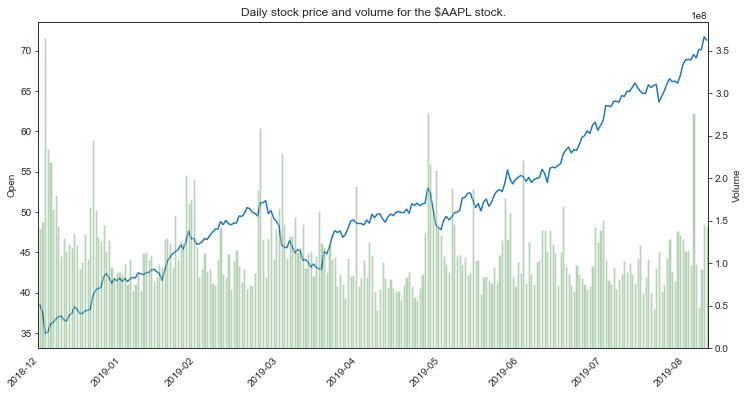

We can also observe the distribution of the volume and daily price difference between    Open and Closing of the market.


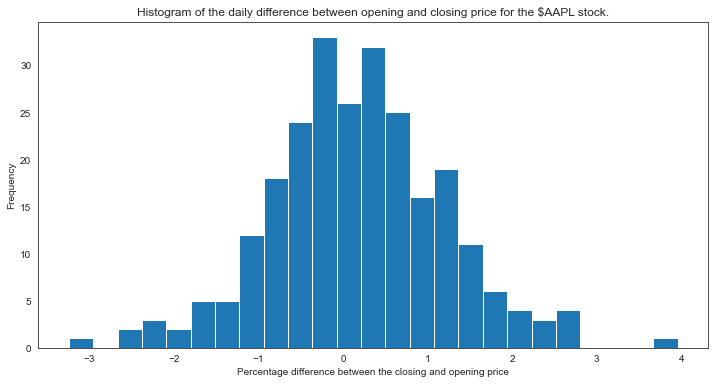

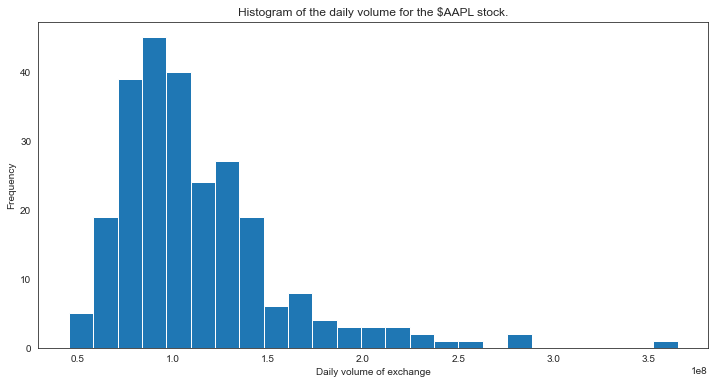

In [14]:
applestock()

In [31]:
filter_quotes(r"data/quotes-2009.json.bz2", speakers = ['obama'], keywords=["yes we can"], chunknum = 10, save="filtered_quotes_2008")

Chunks filtered:   0%|          | 0/10 [00:00<?, ?chunk/s]

INFO: 10000 quotes will be inspected


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2009-05-12-065061,this is where young folks who are interested i...,jason myers,[Q21066626],2009-05-12 13:02:54,2,"[[jason myers, 0.5772], [None, 0.4228]]",[http://app.com/article/20090512/NEWS/90512027...,A
1,2009-06-24-071463,this marks the very logical next evolution of ...,brian roberts,"[Q1057730, Q27978787, Q4964404, Q4965138, Q496...",2009-06-24 17:26:51,37,"[[brian roberts, 0.372], [None, 0.2367], [larr...",[http://fox59.com/news/nationworld/sns-ap-us-t...,A
2,2009-06-17-072565,this means that president obama and the democr...,president obama,[Q76],2009-06-17 13:37:24,1,"[[president obama, 0.7067], [None, 0.2933]]",[http://politicalticker.blogs.cnn.com/2009/06/...,A
3,2009-08-19-000236,a big question is exactly how much is enough t...,donald rumsfeld,[Q184650],2009-08-19 05:34:57,1,"[[donald rumsfeld, 0.4412], [president bush, 0...",[http://danishkada.wordpress.com/2009/08/16/am...,A
4,2009-07-30-000611,a chunk of the allowances need to be set aside...,tom harkin,[Q465617],2009-07-30 20:34:17,2,"[[tom harkin, 0.5097], [None, 0.4903]]",[http://deltafarmpress.com/legislative/cap-tra...,A
...,...,...,...,...,...,...,...,...,...
511,2009-04-28-045161,"i was boxing him southpaw, which means my bala...",calvin brock,"[Q47541654, Q711878]",2009-04-28 00:07:02,1,"[[calvin brock, 0.5201], [jameel mccline, 0.10...",[http://maxboxing.com/Kim/Kim111405.asp],A
512,2009-09-11-031248,i was in the next tier and was still competing...,None,[],2009-09-11 10:33:55,1,"[[None, 0.5987], [doug wood, 0.4013]]",[http://magazine.utoronto.ca/life-on-campus/po...,A
513,2009-09-01-028146,i was shooting a scene where harry is fighting...,None,[],2009-09-01 05:30:27,2,"[[None, 0.4074], [peter shaffer, 0.2442], [dan...",[http://aceshowbiz.com/news/view/00026866.html...,A
514,2009-03-17-052721,i was sworn in with my hand on the family bibl...,barack obama,[Q76],2009-03-17 06:00:55,1,"[[barack obama, 0.7821], [None, 0.2179]]",[http://blogs.myspace.com/index.cfm?fuseaction...,A


In [19]:
any(x in df["quotation"].str.split(" ") for x in ["is"])

False

In [ ]:
for year in ["2014", "2015", "2016", "2017", "2018", "2019", "2020"]:
  filter_quotes(f"data/quotes-{year}.json.bz2", keywords=["yes we can", "where"], save="filtered_quotes_{year}")

In [28]:
keywords = ["the","is"]
df["quotation"].str.split(" ").apply(lambda x : bool(set(x) & set(keywords)))

3       True
19      True
27      True
40      True
54      True
       ...  
896    False
957     True
988    False
991     True
996     True
Name: quotation, Length: 62, dtype: bool